In [3]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [91]:
# read in file
file = Path("crypto_data.csv")
df = pd.read_csv(file)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [57]:
# Data Cleaning 

# filter for coins being traded
only_traded_coins_df = df[df["IsTrading"] == True]

# drop trading column
droped_trade_col = only_traded_coins_df.drop(['IsTrading'], axis = 1)

# remove rows with at least one null value
no_nulls_df = droped_trade_col.dropna(how = "any")

# filter for currencies where coins mined is > 0
mined_coins_df = no_nulls_df[no_nulls_df['TotalCoinsMined'] > 0]


# delete coin name column
no_coin_name_df = mined_coins_df.drop(["CoinName"],axis = 1)
no_coin_name_df = no_coin_name_df.drop(["Unnamed: 0"],axis = 1)

# make coin supply a numeric value as it as an object
# determined after abnormal number of columns and column names including total coin supply upon applying pd.get_dummies()
# print(list(no_coin_name_df.dtypes))
no_coin_name_df["TotalCoinSupply"] = pd.to_numeric(no_coin_name_df["TotalCoinSupply"])

# convert categorical into numerical using dummy variables
dum_df = pd.get_dummies(no_coin_name_df)

# scale the data
scaled_data = StandardScaler().fit_transform(dum_df)

# create final data frame and display it 
col_names = dum_df.columns
clean_df = pd.DataFrame(scaled_data,columns = col_names)
clean_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
1,-0.093970,-0.145009,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
2,0.524946,4.489424,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
3,-0.116715,-0.152560,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
4,-0.114747,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396


In [70]:
# Use PCA to reduce Dimensions
pca = PCA(n_components = 0.90)
pca_data = pca.fit_transform(clean_df)
col_names = ["principle component " + str(i) for i in range(pca_data.shape[1])]
pca_df = pd.DataFrame(data = pca_data, columns = col_names)
print(f"Number of features is now {pca_df.shape[1]}")
pca_df.head()

# How did number of features change?
# Went from 98 to 74

Number of features is now 74


,principle component 0,principle component 1,principle component 2,principle component 3,principle component 4,principle component 5,principle component 6,principle component 7,principle component 8,principle component 9,...,principle component 64,principle component 65,principle component 66,principle component 67,principle component 68,principle component 69,principle component 70,principle component 71,principle component 72,principle component 73
0,-0.335099,1.032189,-0.590713,0.001397,-1.308850e-14,-1.266160e-11,2.080310e-14,-0.007129,-1.319756,-0.051813,...,3.459699e-15,2.014069e-15,2.658265e-16,9.165964e-16,1.972844e-15,5.998157e-15,2.236962e-15,3.089610e-15,2.866068e-15,1.583200e-15
1,-0.318434,1.032331,-0.591126,0.001386,-1.323705e-14,-1.255835e-11,2.069088e-14,-0.007739,-1.322514,-0.056674,...,4.477850e-15,1.257149e-15,8.754675e-18,1.248435e-16,3.144746e-15,7.501685e-15,2.309334e-15,4.933720e-15,1.800386e-15,1.004894e-15
2,2.305468,1.656383,-0.683617,0.004731,-2.972731e-14,-4.290588e-11,2.729459e-14,-0.054781,-1.542879,-0.943951,...,1.053780e-14,-3.990608e-14,2.300265e-14,7.314042e-14,-5.883687e-14,-6.653927e-14,-5.448342e-15,-6.098495e-14,6.982033e-15,-6.422078e-14
3,-0.145184,-1.320593,0.192813,-0.001229,7.739934e-15,1.113849e-11,-6.783813e-15,-0.002071,0.281463,0.251862,...,-2.430801e-16,-9.093636e-16,1.426626e-15,9.140362e-15,-1.190865e-14,-2.632450e-15,5.331215e-15,1.479103e-16,-4.780285e-15,-8.217000e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.629240e-14,1.545822e-11,-1.329989e-14,0.027735,0.519099,0.188820,...,-1.719534e-13,1.779051e-13,-2.645889e-15,-4.405292e-14,-4.455551e-15,1.512555e-14,1.207593e-13,-1.719674e-14,3.827912e-14,2.959987e-14


[dtype('float64')]


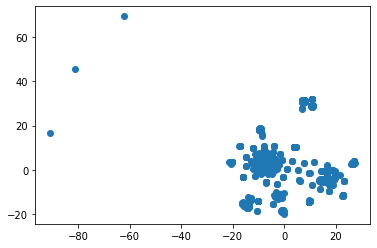

In [83]:
print(pca_df.dtypes.unique())
# Use TNSE on the PCA transformed data to reduce Dimensions further 
# and create a scatter plot of TNSE results

# get error when specifying learn rate 
tsne = TSNE(n_components = 2)
tsne_data = tsne.fit_transform(pca_df)
col_names_0 = ["TN 1", "TN 2"]
tsne_df = pd.DataFrame(data = tsne_data, columns = col_names_0)
tsne_df.head()

plt.scatter(tsne_df['TN 1'],tsne_df['TN 2'])

### Are there distinct clusters?
There are two large clusters, two small clusters, and a set of outliers visible. 

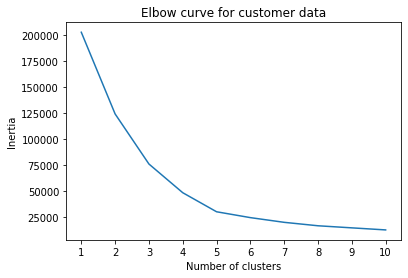

Text(0.5, 1.0, 'Labeled Clusters Plot')

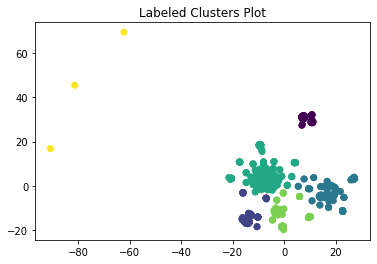

In [90]:
# determine optimal k using elbow curve  
# include train test split here?
inertia = []
k = list(range(1, 11))
label_list = []
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_df)
    inertia.append(km.inertia_)
    label_list.append(km.predict(tsne_df))

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

# Label the clusters
# will use k  = 5 as that is where the plot starts becoming constant
optimal_k = 5
tsne_df['Class'] = label_list[optimal_k]
tsne_df.head()

plt.scatter(tsne_df['TN 1'],tsne_df['TN 2'],c = tsne_df['Class'])
plt.title("Labeled Clusters Plot")

### Recommendation to Clients. Can currencies be clustered together? If so how many clusters should be used?
The optimal number of clusters to use is 5 based on intertia analysis. Based on the colorization of the plot using KMeans it is consistent with the clusters considered prior to applying the algorithm. Based on the plot above the currencies can absolutely be clustered 
